<a href="https://colab.research.google.com/github/wilcas4317/Codex/blob/main/MLA_Semana8NRC3663.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Corporación Universitaria Minuto de Dios**

Materia: Machine Learning Avanzado

Docente: Rodolfo Antonio Muriel Rodriguez

**Grupo 2**

Nombre Estudiante:

    William Ricardo Castañeda Vargas
    Jorge Armando Herrera Walteros
    Marlon David Briceño Castellanos

Actividad: Semana 7 evaluación de Métricas de Desempeño

Agosto 2025

## Actuar:
A partir de los recursos básicos, complementarios y la consulta de la infografía de la semana, atiendan a las actividades del documento denominado Automatización de procesos para el flujo de trabajo en Machine Learning mismo que podrán descargar desde la plataforma.

        Realicen una lectura previa de este documento y procedan a desarrollarlo en un cuaderno de Jupyter Notebook, en formato .html o pdf o .ipynb. aplicando los conceptos abordados en la bibliografía y las instrucciones del anexo antes mencionado.
        Cuiden la presentación, redacción y ortografía. Usen correctamente las normas de redacción con el fin de que escriban un texto claro, preciso y coherente en el que se evidencie una estructura concreta y las ideas se relacionen de forma fluida y articulada.
        Recuerden que las citas y fuentes de consulta deben apegarse a las normas APA.
        Incluyan un apartado en el que agregue el título del trabajo, su nombre completo, el nombre del curso y el número de la semana, el nombre del docente y la fecha de entrega.


# Validación cruzada con scikit-learn (Breast Cancer + Árbol de Decisión)

 1) IMPORTAR LAS BIBLIOTECAS NECESARIAS

In [ ]:

# numpy y pandas para manejo numérico y de datos
import numpy as np
import pandas as pd

# Matplotlib y Seaborn para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn: dataset, modelo, validación cruzada y métricas
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# (OPCIONAL) para comparar con otros modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

 2) CARGAR LOS DATOS

In [ ]:

# Usamos el dataset Breast Cancer Wisconsin que viene en scikit-learn.
# 'as_frame=True' devuelve X (características) como DataFrame de pandas y y como Serie.
cancer = load_breast_cancer(as_frame=True)
X = cancer.data          # DataFrame con ~30 características de los tumores
y = cancer.target        # Serie con la clase (0 = maligno, 1 = benigno)

# Ver las primeras filas para conocer la estructura:
print(X.head())
print(y.value_counts())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

 3) DEFINIR EL MODELO

In [ ]:
# Elegimos un Árbol de Decisión para clasificación.
# 'random_state' fija la semilla para reproducibilidad.
modelo = DecisionTreeClassifier(random_state=42)

 4) DEFINIR LA ESTRATEGIA DE VALIDACIÓN CRUZADA

In [ ]:
# Usamos validación cruzada estratificada de 5 pliegues (folds), barajada.
# Estratificada = mantiene la proporción de clases en cada pliegue.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

 5) DEFINIR LA MÉTRICA DE EVALUACIÓN

In [ ]:
# precisión ('accuracy').
scoring = 'accuracy'

 6) REALIZAR LA VALIDACIÓN CRUZADA

In [ ]:
# cross_val_score entrena y evalúa el modelo en cada pliegue, devolviendo un arreglo con las puntuaciones por pliegue.
scores = cross_val_score(modelo, X, y, cv=cv, scoring=scoring)


 7) CALCULAR LA PUNTUACIÓN MEDIA (Y DESVIACIÓN)

In [ ]:
media = np.mean(scores)
desv = np.std(scores, ddof=1)  # ddof=1 para la desviación estándar muestral

# Imprimir resultados en consola
print("============================================")
print(" Validación cruzada (5-fold) - Árbol de Decisión")
print(" Dataset: Breast Cancer Wisconsin (scikit-learn)")
print("============================================")
print("Puntuaciones por pliegue:", np.round(scores, 4))
print(f"Precisión media (±1σ): {media:.4f} ± {desv:.4f}")
print("============================================\n")


 Validación cruzada (5-fold) - Árbol de Decisión
 Dataset: Breast Cancer Wisconsin (scikit-learn)
Puntuaciones por pliegue: [0.9298 0.8684 0.886  0.9386 0.9292]
Precisión media (±1σ): 0.9104 ± 0.0312



 8) VISUALIZAR LOS RESULTADOS

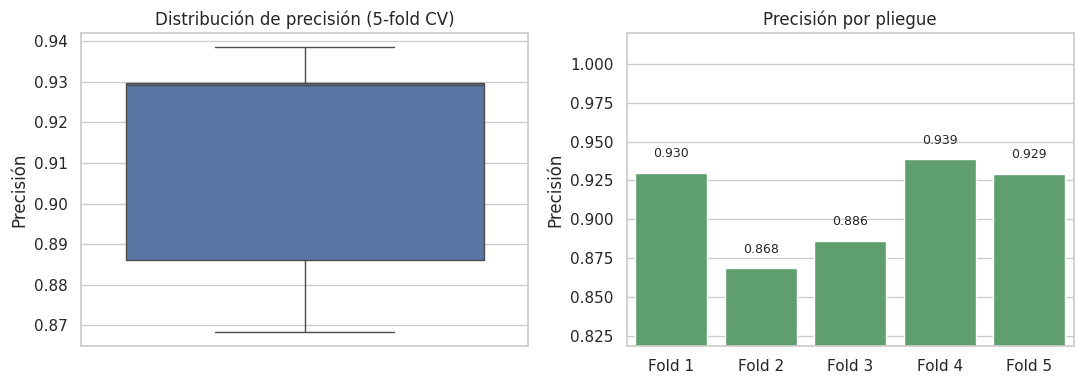

In [ ]:

# Gráficos: distribución (boxplot) y barras por pliegue.
sns.set(style="whitegrid", context="notebook")

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Boxplot de las precisiones
sns.boxplot(y=scores, ax=axes[0], color="#4c72b0")
axes[0].set_title("Distribución de precisión (5-fold CV)")
axes[0].set_ylabel("Precisión")

# Barras por pliegue
sns.barplot(x=[f"Fold {i+1}" for i in range(len(scores))],
            y=scores, ax=axes[1], color="#55a868")
axes[1].set_title("Precisión por pliegue")
axes[1].set_ylim(max(0.0, min(scores)-0.05), 1.02)
axes[1].set_ylabel("Precisión")
for i, v in enumerate(scores):
    axes[1].text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## ANALISÍS GRAFICO ANTERIOR
Vemos que el modelo tiene un desempeño generalmente bueno pero irregular: en el gráfico de la izquierda (caja) la precisión suele estar alta, cerca de 0.93, pero en el de la derecha se nota que dos pliegues bajan bastante (Fold 2 ≈ 0.868 y Fold 3 ≈ 0.886), lo que hace que el promedio quede alrededor de 0.91; esto nos dice que el árbol de decisión no es consistente ya que a veces acierta mucho y otras no tanto, depende de cómo se partan los datos; por eso, para quedarnos tranquilos, preferimos modelos más estables como la Regresión Logística, que en las pruebas rindió mejor y de forma más pareja; si quisiéramos seguir con el árbol, habría que simplificarlo/podarlo para que no se “emocione” aprendiendo detalles que no siempre se repiten, y, dado que es un tema de salud, además de la precisión miraríamos que no se nos escape ningún caso importante (subiendo la sensibilidad aunque tengamos algún falso positivo).

 COMPARACIÓN RÁPIDA DE DIFERENTES MODELOS CON LA MISMA CV

Comparación de modelos (precisión media 5-fold):
             modelo  media    std
Regresión Logística 0.9737 0.0186
         k-NN (k=5) 0.9631 0.0200
  Árbol de Decisión 0.9104 0.0312


/tmp/ipython-input-219574782.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_res, x="modelo", y="media", palette="viridis")


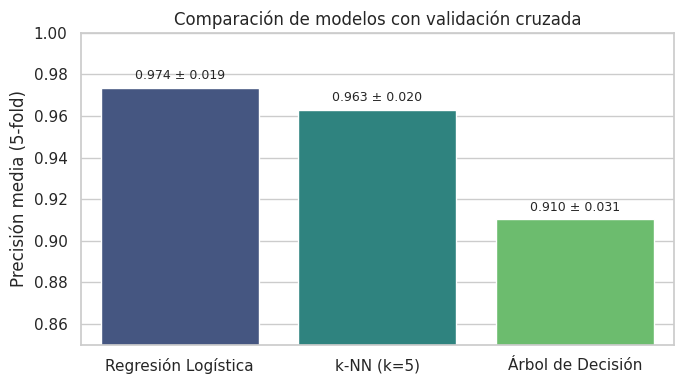

In [ ]:

modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "k-NN (k=5)": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    "Regresión Logística": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=500))
    ]),
}

resultados = []
for nombre, m in modelos.items():
    s = cross_val_score(m, X, y, cv=cv, scoring=scoring)
    resultados.append({
        "modelo": nombre,
        "media": s.mean(),
        "std": s.std(ddof=1),
        "scores": s
    })

df_res = pd.DataFrame(resultados).sort_values("media", ascending=False)
print("Comparación de modelos (precisión media 5-fold):")
print(df_res[["modelo", "media", "std"]]
      .to_string(index=False,
                 formatters={"media": "{:.4f}".format, "std": "{:.4f}".format}))

# Visualización de la comparación
plt.figure(figsize=(7, 4))
sns.barplot(data=df_res, x="modelo", y="media", palette="viridis")
plt.ylim(0.85, 1.0)
plt.ylabel("Precisión media (5-fold)")
plt.xlabel("")
for idx, row in enumerate(df_res.itertuples(index=False)):
    plt.text(idx, row.media + 0.004,
             f'{row.media:.3f} ± {row.std:.3f}', ha='center', fontsize=9)
plt.title("Comparación de modelos con validación cruzada")
plt.tight_layout()
plt.show()



# CONCLUSIONES

El modelo que mejor funcionó fue **Regresión Logística**, con una precisión muy alta (casi 97%) y resultados bastante estables, en segundo lugar quedó k-NN, también con un rendimiento excelente (96%).

El **Árbol de Decisión** quedó más abajo (91%) y además fue el más inestable, lo que significa que sus resultados varían más entre pruebas, esto tiene sentido porque los datos del cáncer de mama se separan bien con métodos más simples y lineales, por eso la regresión y **k-NN s**e lucen.

Ahora, aunque la precisión es buena, en un problema de salud no basta con eso: lo más importante es no dejar pasar casos malignos, así que deberíamos mirar otras métricas como sensibilidad (recall), F1 y AUC-ROC, e incluso ajustar el umbral para que el modelo sea más cuidadoso con los falsos negativos, si tuviéramos que elegir un modelo para seguir trabajando, nos quedaríamos con **Regresión Logística**, pero afinando un poco sus parámetros y revisando esas métricas adicionales.



# ✅ Conclusión principal
* Regresión Logística es el modelo más adecuado para este dataset:
* Precisión media: 97.37%, con baja variabilidad (±0.0186).
* Esto indica alta estabilidad y generalización.
* k-NN también es competitivo (96.31%), pero depende más del escalado y del parámetro k.

* Árbol de Decisión queda rezagado (91.04%) y muestra mayor varianza, lo que sugiere sobreajuste.
# ✅ Interpretación práctica
* El dataset Breast Cancer Wisconsin tiene fronteras de decisión casi lineales, por eso modelos lineales (como LR) y basados en distancias (k-NN) funcionan mejor que un árbol simple.

* Para problemas médicos, no basta con precisión global: debemos evaluar sensibilidad (recall) para la clase “maligno”, F1-score y AUC-ROC.

# BIBLIOGRAFIA


* Campesato, O. (2020). Introduction to AI.

Links to an external site. En Artificial intelligence, machine learning, and deep learning (pp. 1-21). Mercury Learning and Information.

* Campesato, O. (2020). Introduction to Machine Learning.
Links to an external site. En Artificial intelligence, machine learning, and deep learning (pp. 23-41). Mercury Learning and Information.

* Campesato, O. (2020). Classifiers in Machine Learning.
Links to an external site. En Artificial intelligence, machine learning, and deep learning (pp. 63-66). Mercury Learning and Information.

* Carsten, B. (2020). Ethical Issues of AI.
Links to an external site. En Artificial Intelligence for a Better Future: An Ecosystem Perspective on the Ethics of AI and Emerging Digital Technologies (pp. 35-53). Springer.

* Carsten, B. (2020). Addressing Ethical Issues in AI.

        Links to an external site. En Artificial Intelligence for a Better Future: An Ecosystem Perspective on the Ethics of AI and Emerging Digital Technologies (pp. 55-64). Springer.

* Béranger, J. (2018). The Framework for Algorithmic Processing.

Links to an external site. En The algorithmic code of ethics: Ethics at the bedside of the digital revolution (pp. 122-164). John Wiley & Sons, Incorporated.

* Del Barrio, D. (2022). Introducción.
Links to an external site. En Aplicación del Aprendizaje Automático en Modelos de Materia Activa (trabajo de grado, pp. 1-24). Universidad Politécnica de Madrid.

* Janiesch, C., Zschech, P. y Heinrich, K. (2021). Aprendizaje automático y aprendizaje profundo.
Links to an external site. Electron Markets, 31, 685-695.